**Bagging**

**(Code: Subhajit Das)**

**What is Bagging?**

Bagging, short for **bootstrap aggregating**, is an ensemble learning method used in machine learning to improve the stability and accuracy of algorithms, particularly decision trees. It works by creating multiple subsets of the original training data through random sampling with replacement, training a model on each subset, and then combining their predictions to form a final model.

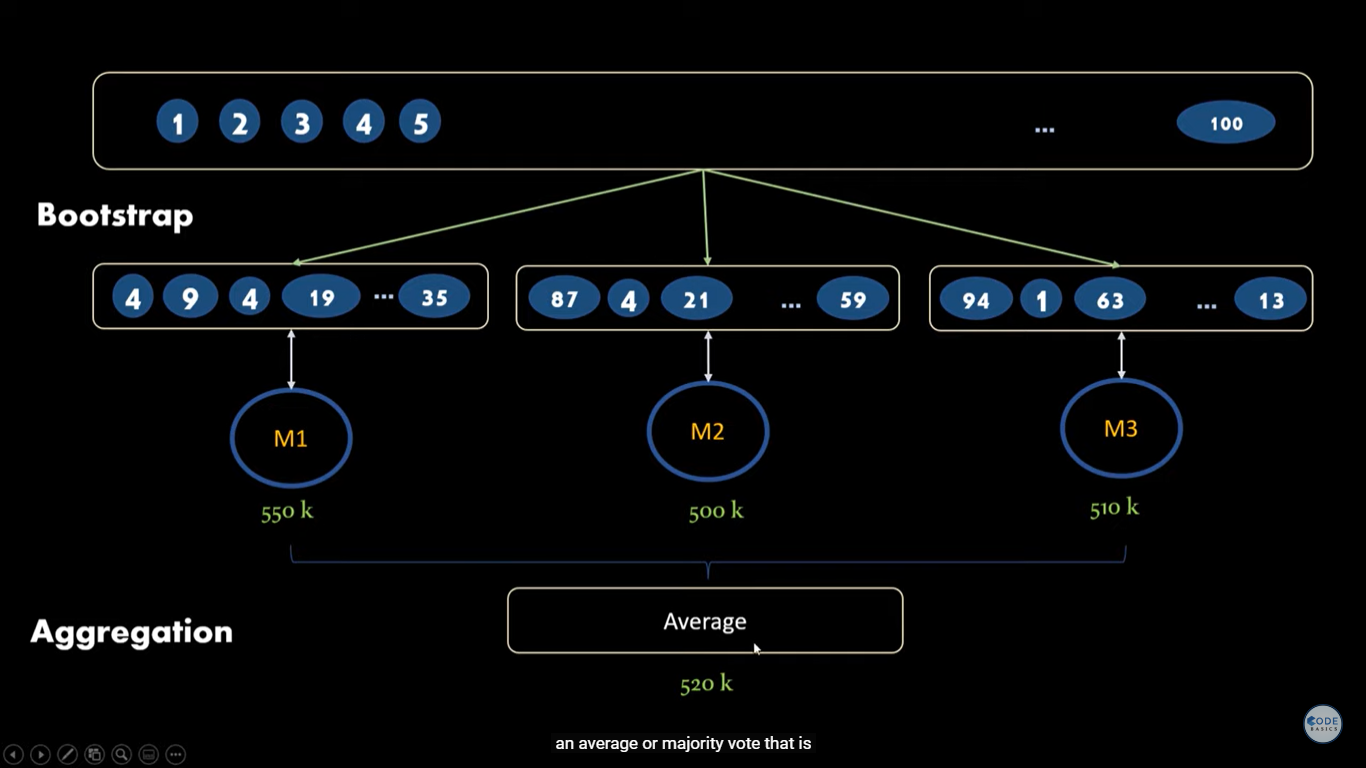

**Where we can use Bagging?**

Bagging can be used in various machine learning tasks where the goal is to reduce variance, improve model accuracy, and prevent overfitting. Here are some common scenarios where bagging is particularly useful:

1. **High Variance Models**: Bagging is often applied to machine learning algorithms that are prone to high variance, such as decision trees. By combining the predictions of multiple models, bagging helps to smooth out the predictions and reduce the likelihood of overfitting to the training data.

2. **Classification Problems**: In classification tasks, bagging can improve predictive performance by aggregating the votes of multiple classifiers. This is especially beneficial when the classifiers are unstable and sensitive to small changes in the training set.

3. **Regression Problems**: For regression tasks, bagging can average out the predictions of multiple regressors to produce a more accurate estimate. This is useful when individual models have a tendency to overfit or when the dataset has a lot of noise.

4. **Unbalanced Datasets**: Bagging can be effective for dealing with unbalanced datasets where one class is significantly underrepresented. The bootstrapping process can help ensure that each model sees a more balanced representation of the classes.

5. **Feature Selection**: Bagging can be used as a feature selection technique. By observing which features are consistently deemed important across the different models, you can gain insights into which features are most predictive.

6. **Time Series Forecasting**: Although bagging is not commonly used for time series data due to the sequential nature of the data, it can still be applied with caution. Specialized time series methods that respect the temporal structure can be bagged to improve forecasts.

7. **Remote Sensing and Image Classification**: Bagging can be used in remote sensing applications where decision trees or other models are used to classify land cover or other features from satellite imagery.

8. **Bioinformatics**: In bioinformatics, bagging can help in tasks like gene expression analysis or protein structure prediction, where the data may be complex and noisy.

9. **Financial Modeling**: Bagging can be used in financial modeling to predict stock prices, credit scoring, or risk assessment, where it's crucial to have robust and accurate models.

10. **Ensemble Learning Frameworks**: Bagging is a key component of ensemble learning frameworks like Random Forests, which are widely used across different domains for their robustness and accuracy.

It's important to note that while bagging can improve model performance, it also increases computational complexity and resource usage, as multiple models need to be trained and stored. Therefore, it's essential to consider the trade-offs between performance gains and computational costs when deciding to use bagging.

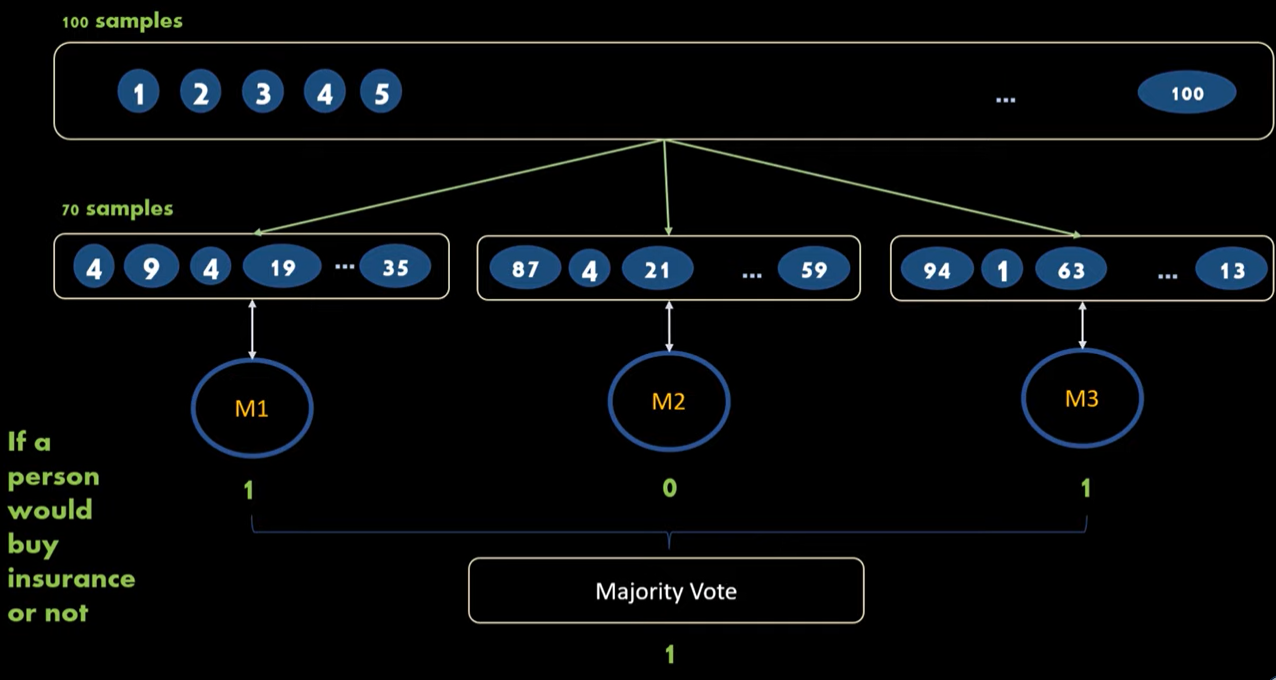

**How Bagging works:**

Bagging, or bootstrap aggregating, is an ensemble learning technique used to improve the stability and accuracy of machine learning algorithms. It works by following these steps:

1. **Bootstrap Sampling**: Create multiple subsets of the original training dataset by randomly sampling with replacement. Each subset is called a bootstrap sample and can have the same size as the original dataset. Some instances may appear multiple times in a subset, while others may not appear at all.

2. **Model Training**: Train a separate model (often a decision tree) on each bootstrap sample. Since the data in each subset is different, the resulting models will be diverse.

3. **Aggregation**: Combine the predictions from all the individual models to form a final prediction. For classification problems, this is typically done by majority voting, where the most common prediction among all models is chosen. For regression problems, the average of all model predictions is used.

The key idea behind bagging is that by averaging many noisy but approximately unbiased models, the variance of the final prediction can be reduced, leading to a more accurate and robust model. Bagging is particularly effective for high-variance, low-bias models, such as decision trees.

By combining the predictions from multiple models, bagging helps to mitigate the effects of overfitting and improves the generalization ability of the model on unseen data.

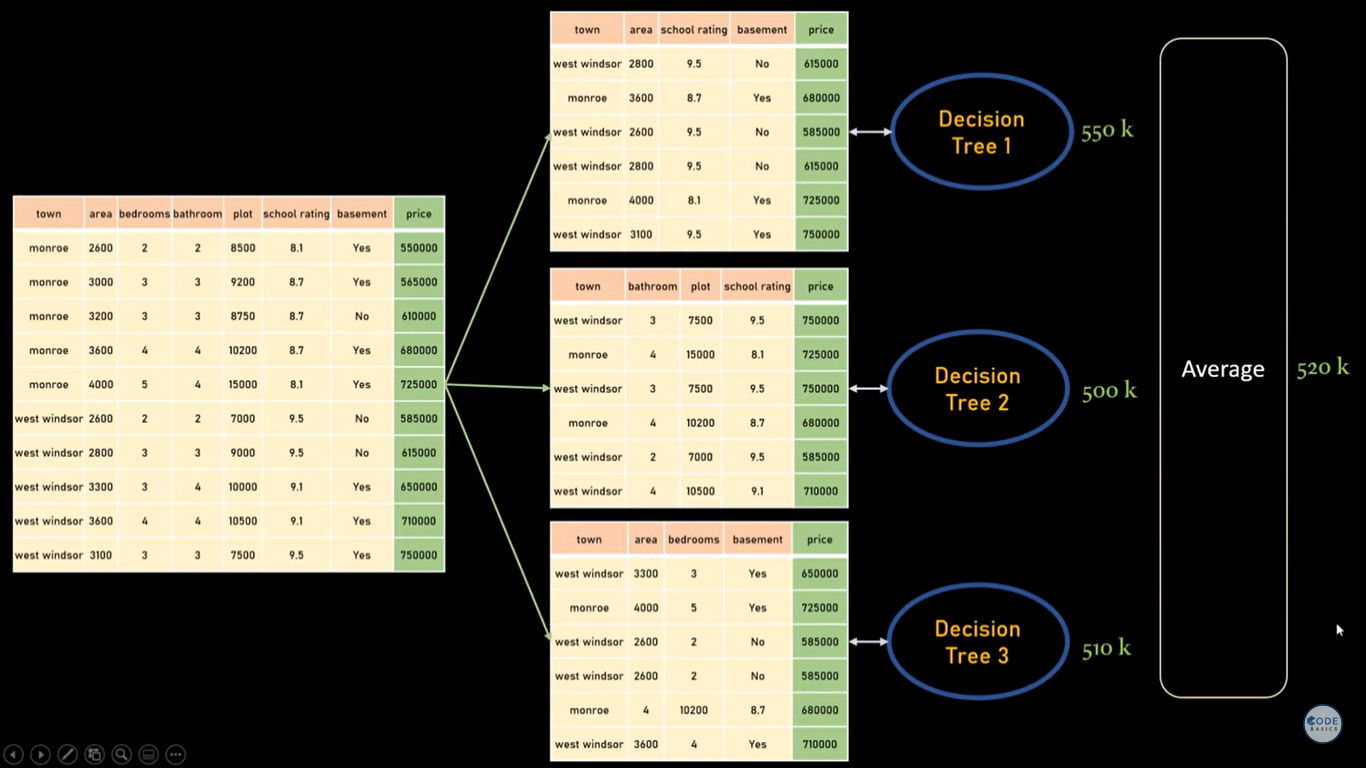

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Diabetes Dataset**

In [ ]:
diabetes_df = pd.read_csv("/content/drive/MyDrive/ML and DL DataSets/Diabetes_Bagging.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

**Separating features and labels**

In [ ]:
x = diabetes_df.drop(['Outcome'], axis = 1)
x.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47
767,1,93,70,31,0,30.4,0.315,23


In [ ]:
y = diabetes_df['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    stratify=y,
                                                    random_state=10)

In [ ]:
# length or sample of train dataset
len(x_train)

576

In [ ]:
y_train.value_counts()

0    375
1    201
Name: Outcome, dtype: int64

In [ ]:
# length or sample of test dataset
len(x_test)

192

In [ ]:
y_test.value_counts()

0    125
1     67
Name: Outcome, dtype: int64

**Train using stand alone model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Decision = DecisionTreeClassifier(criterion = 'gini')
Decision.fit(x_train, y_train)

DecisionTreeClassifier()

<function matplotlib.pyplot.show(close=None, block=None)>

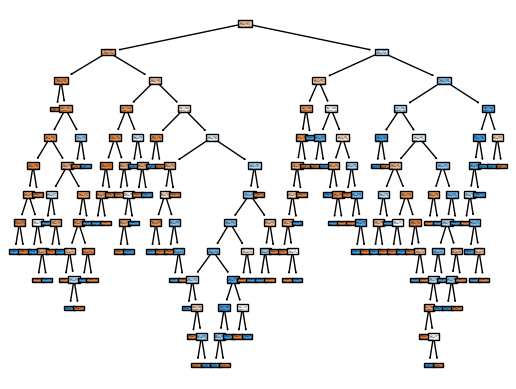

In [ ]:
# Represent the structure of a decision tree model
from sklearn import tree

tree.plot_tree(Decision,
               filled=True) # To print colorful
plt.show

**Checking Performance of Stand alone model**

In [ ]:
# Evaluates the performance of a machine learning model using cross-validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DecisionTreeClassifier(),
                         x, # Feature set for the dataset.
                         y, # Target variable to predict
                         cv=5) # Number of folds in the cross-validation process
''' The function will train and test the model 5 times (once for each fold), and return an array of scores representing the model’s performance on each fold. You can then analyze these scores to
get an idea of how well the model might perform on unseen data.'''
print(scores)

[0.69480519 0.65584416 0.66233766 0.77777778 0.70588235]


In [ ]:
# Getting mean of cross validation
scores.mean()

0.6993294287411935

In [ ]:
# Getting accuracy score
Decision.score(x_test, y_test)

0.6875

**Train using Bagging**

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    estimator = DecisionTreeClassifier(), # Base estimator to fit on random subsets of the dataset
    n_estimators = 100, #  Number of base estimators in the ensemble. In this case, 100 decision trees will be created in bagging
    max_samples = 0.8, # Each tree will be trained on 80% of the data samples
    oob_score = True, # Enables the calculation of the out-of-bag score, which is an estimate of the model’s performance on unseen data
    random_state = 0 # Controls the randomness for reproducibility of the results
)
bag_model.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=0)

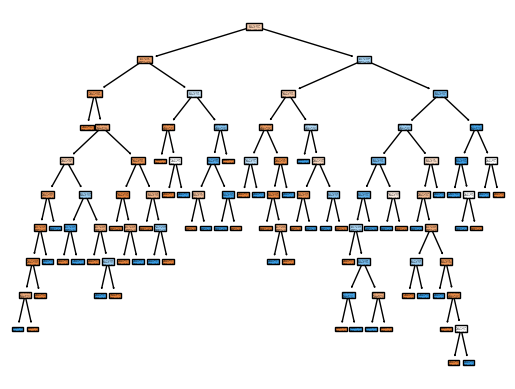

In [ ]:
# Extract one Decision Tree from the Bagging ensemble, It's not possible to print all Decision Tree
single_tree = bag_model.estimators_[0]

# Plot the single Decision Tree
tree.plot_tree(single_tree, filled=True)
plt.show()

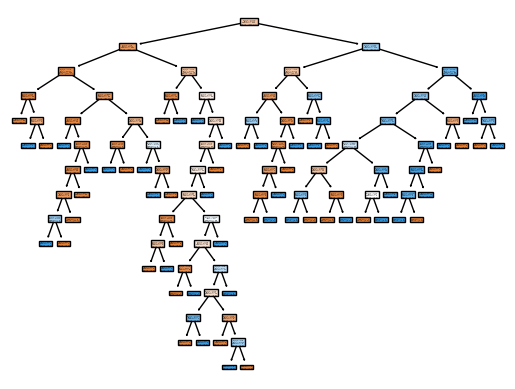

In [ ]:
# This Decision Tree's are different from each other in bagging
single_tree = bag_model.estimators_[99]

# Plot the single Decision Tree
tree.plot_tree(single_tree, filled=True)
plt.show()

**Checking Performance of Bagging Model**

In [ ]:
# Getting Out-of-Bag (OOB) score
bag_model.oob_score_ # Estimate of the model’s performance on unseen data

0.7552083333333334

In [ ]:
# Evaluates the performance of a machine learning model using cross-validation
scores = cross_val_score(bag_model, x, y, cv=5)
print(scores)

[0.75324675 0.72727273 0.74675325 0.82352941 0.73856209]


In [ ]:
# Getting mean of cross validation
scores.mean() # We can see some improvement in test score with bagging classifier as compared to a standalone classifier

0.7578728461081402

In [ ]:
# Getting accuracy score
bag_model.score(x_test, y_test)

0.7760416666666666